## Info

This file is just for testing random things, shouldn't be taken into account

In [ ]:
import sys

sys.path.append('../')

# from metaheuristics import DifferentialEvolution
import src.config as config
import src.utils as utils
import src.agents as agents
# from src.metaheuristics import DifferentialEvolution

import src.synergy as synergy

import numpy as np

In [ ]:
# Initialize population

search: utils.Search = config.search
space: utils.SearchSpace = search.space

population = [
    utils.Agent(i, space.random_bounded(config.dimensions), search=config.search) for i in range(config.population_size)
]

# Initialize differential evolution

crossover_rate = 0.5
differential_weight = 0.5

params = {
    'agents': population,
    'population_size': config.population_size,
    'diff_weight': differential_weight,
    'crossover_rate': crossover_rate
}

de = DifferentialEvolution(
    search=config.search,
    **params
)

In [ ]:
for _ in range(0, config.iterations):
    de.optimize()

print(de.best_agent)
print(np.max(np.array([a.fitness for a in de.agents])))

In [ ]:
def new_differential_evolution():
    """
    Instantiates a new Differential Evolution algorithm with a random population.
    """
    search: utils.Search = config.search
    space: utils.SearchSpace = search.space

    population = [
        utils.Agent(i, space.random_bounded(config.dimensions), search=config.search) for i in range(config.population_size)
    ]

    # Initialize differential evolution

    crossover_rate = np.random.uniform(low=0, high=1)
    differential_weight = np.random.uniform(low=0, high=1)

    params = {
        'agents': population,
        'population_size': config.population_size,
        'diff_weight': differential_weight,
        'crossover_rate': crossover_rate
    }

    de = DifferentialEvolution(
        search=config.search,
        **params
    )

    return de

In [ ]:
ms = [new_differential_evolution() for _ in range(0, 10)]  # 10 metaheuristics to be combined of DE

params = {
    'iterations': config.iterations
}

synergy_boost = synergy.SynergyBoost(metaheuristics=ms, search=config.search, **params)

In [ ]:
synergy_boost.optimize()
print(f'Best agent: {synergy_boost.best_agent} @ Fitness: {synergy_boost.best_agent.fitness} @ Position: {synergy_boost.best_agent.position}')

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

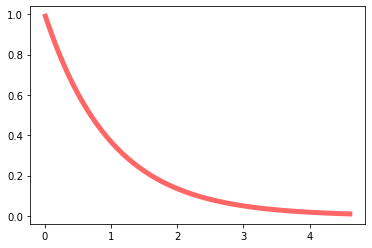

In [12]:
x = np.linspace(st.expon.ppf(.01), st.expon.ppf(.99), 100)
plt.plot(x, st.expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')

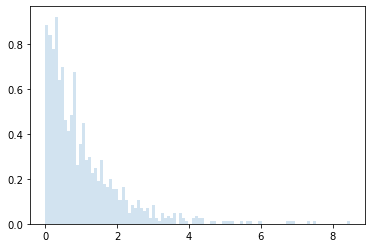

In [20]:
# Gather random samples from the distribution
x = st.expon.rvs(size=1000)
# Plot the histogram
plt.hist(x, bins=100, density=True, histtype='stepfilled', alpha=0.2)
plt.show()
pass

In [23]:
# Gather random samples from the distribution
x = st.expon.rvs(size=100)

# Retrieve probs of the sample by
# calculating the probability of each
probs = st.expon.pdf(x)

# Normalize the probs
probs = np.nan_to_num(probs / np.sum(probs))

# Check they add up to 1
print(np.sum(probs))

1.0


In [5]:
class Foo1():
    def __init__(self, *args, **kwargs) -> None:
        print(kwargs['owner'])

class Foo2(Foo1):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

foo = Foo2(owner='me')

me
